# k-means 군집

In [4]:
install.packages("caret")

also installing the dependencies 'numDeriv', 'SQUAREM', 'colorspace', 'utf8', 'KernSmooth', 'lava', 'backports', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'lifecycle', 'cli', 'fansi', 'pillar', 'pkgconfig', 'stringi', 'assertthat', 'BH', 'plogr', 'rpart', 'survival', 'nnet', 'class', 'prodlim', 'ellipsis', 'vctrs', 'gtable', 'lazyeval', 'MASS', 'mgcv', 'scales', 'tibble', 'viridisLite', 'codetools', 'iterators', 'data.table', 'stringr', 'dplyr', 'gower', 'ipred', 'lubridate', 'tidyr', 'timeDate', 'ggplot2', 'foreach', 'plyr', 'ModelMetrics', 'nlme', 'reshape2', 'recipes', 'withr'



package 'numDeriv' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'utf8' successfully unpacked and MD5 sums checked
package 'KernSmooth' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'backports' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'fansi' successfully unpacked and MD5 sums checked
package 'pillar' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'stringi' s

In [58]:
library(caret)
data(iris)
set.seed(123)
inTrain <- createDataPartition(y=iris$Species, p=0.7, list=FALSE)

training <- iris[inTrain]
testing <- iris[-inTrain]

In [65]:
training <- as.numeric(training[-4])

In [66]:
training.data <- scale(training)
summary(training.data)

       V1          
 Min.   :-1.85626  
 1st Qu.:-0.81994  
 Median :-0.07972  
 Mean   : 0.00000  
 3rd Qu.: 0.66051  
 Max.   : 2.40745  

In [6]:
normalize = function(x){
    return((x-min(x)) / diff(range(x)))
}

In [7]:
training.norm.data <- normalize(training[-5])
summary(training.norm.data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2431  0.4167  0.4343  0.5903  1.0000 

In [24]:
install.packages("NbClust")

package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JMLee\AppData\Local\Temp\RtmpCsVTgQ\downloaded_packages


Warning message in max(DiffLev[, 5], na.rm = TRUE):
"max에 전달되는 인자들 중 누락이 있어 -Inf를 반환합니다"

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
"데이터의 길이[51]가 행의 개수[2]의 배수가 되지 않습니다"Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
"데이터의 길이[51]가 행의 개수[2]의 배수가 되지 않습니다"

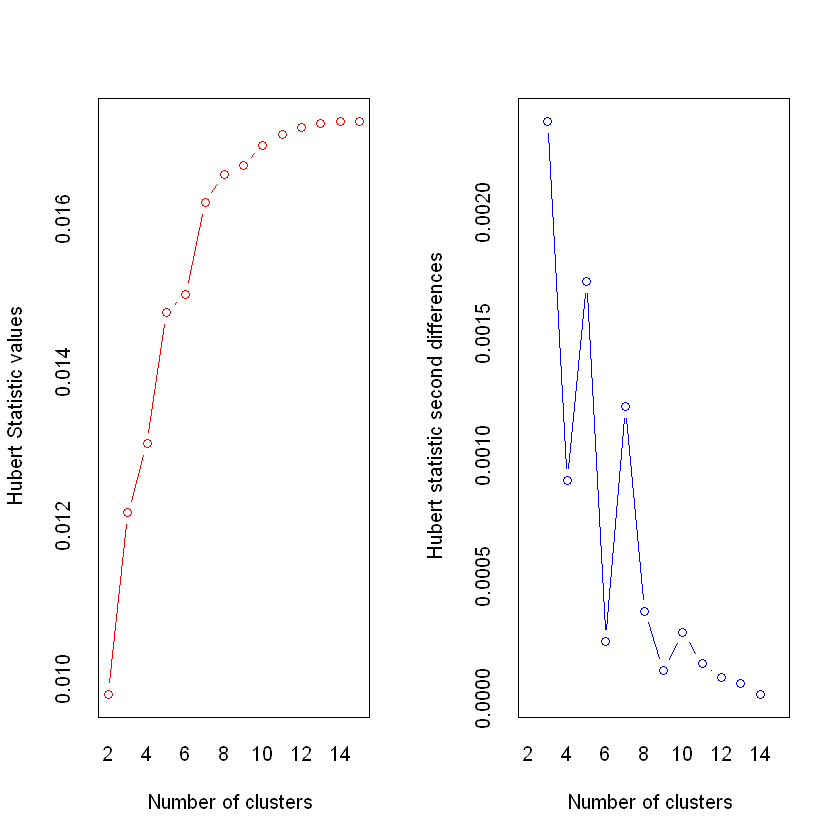

******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 1 proposed 11 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


Warning message in par(mflow = c(1, 1)):
""mflow"는 그래픽 매개변수가 아닙니다"

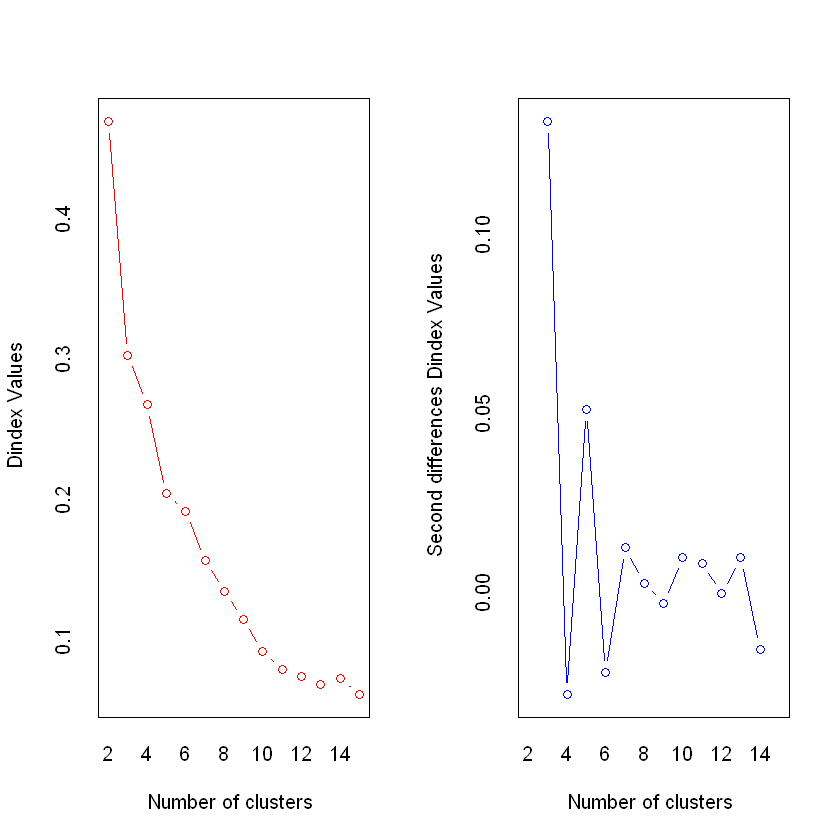

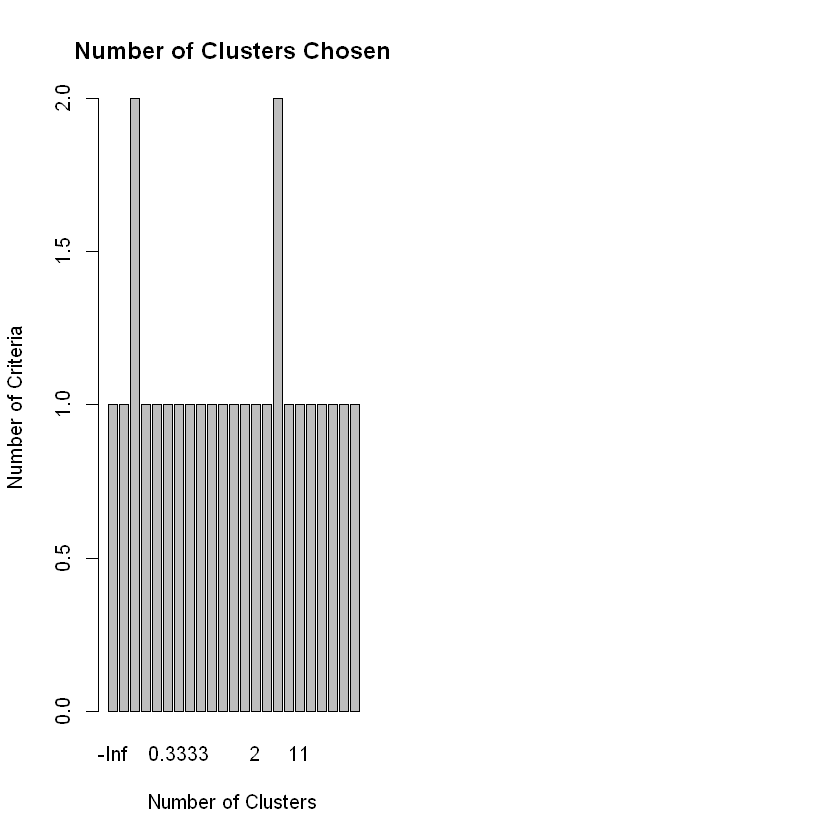

In [31]:
library(NbClust)
nc <- NbClust(training.data, min.nc=2, max.nc=15, method="kmeans")
par(mflow=c(1,1))
barplot(table(nc$Best.n[1,]),
        xlab="Number of Clusters", ylab="Number of Criteria", main="Number of Clusters Chosen")